We do feature selection to:
- reduce the computational cost of the model
- in some cases, improve the performance of the model


The method of the measuring depends on the input and output of the variable - categorical or numerical.

What I am doing is supervised feature selection, which means that I am using the target variable to select the features.



In [81]:
import pandas as pd
from make_predictions import make_predictions


data_path = '../data'
prepared_data_path = f'{data_path}/csv/prepared'

matches_df = pd.read_csv(f'{prepared_data_path}/bundesliga_matches.csv')
# matches_df = remove_collinear_features(matches_df, 0.9)

x = matches_df.drop('target', axis=1)
y = matches_df['target']
cor = matches_df.corr()
cor_target = abs(cor["target"])
relevant_features = cor_target[cor_target>0.4]
relevant_features


/tmp/ipykernel_7128/96640701.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = matches_df.corr()


gf                           0.674326
ga                           0.510050
xg                           0.439787
shooting_standard_gls        0.666425
shooting_standard_sot        0.416572
shooting_standard_g/sh       0.541827
shooting_standard_g/sot      0.443755
shooting_expected_npxg       0.415239
shooting_expected_g-xg       0.495995
shooting_expected_np:g-xg    0.490521
keeper_performance_cs        0.441293
keeper_performance_psxg      0.406904
passing_ast                  0.581055
passing_xag                  0.406127
gca_gca_types_gca            0.638443
gca_gca_types_passlive       0.560671
target                       1.000000
Name: target, dtype: float64

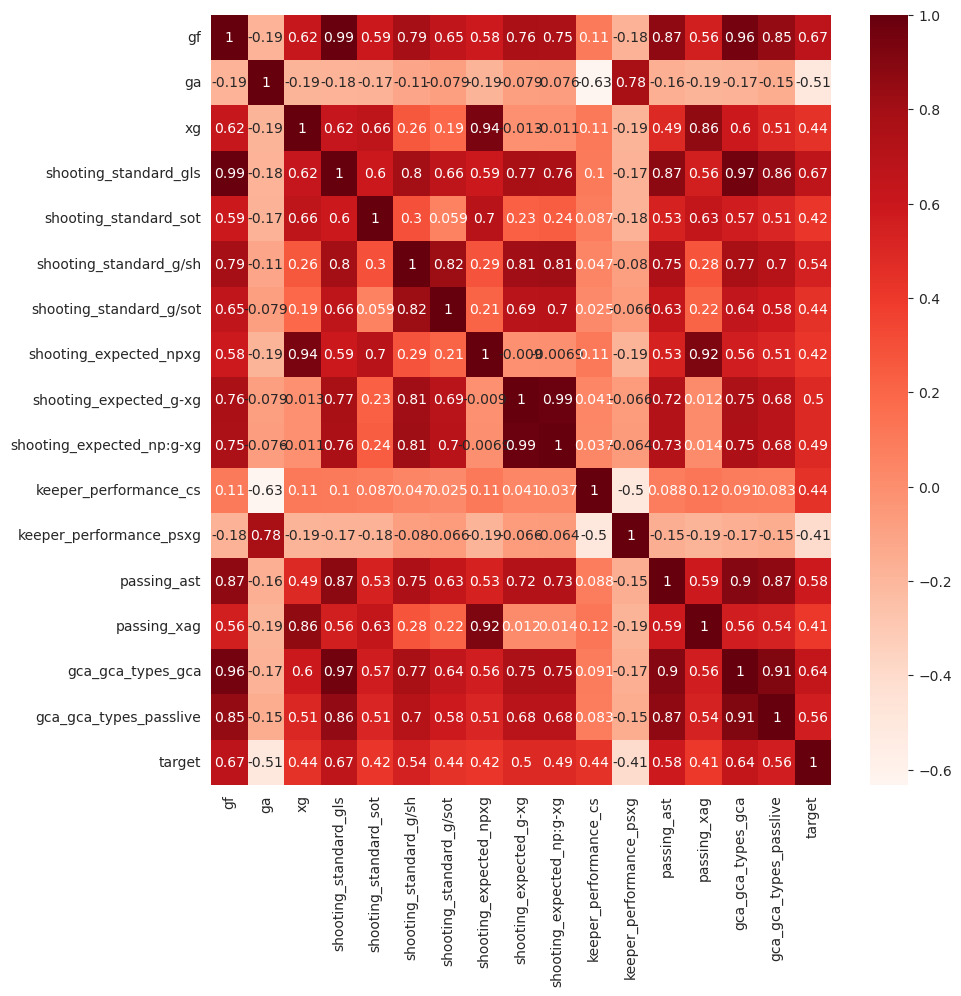

In [82]:
# get the relevant features and see correlation between them
cor = matches_df[relevant_features.index].corr()
# visualize that cor
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [83]:
# get relevant features without target
relevant_features = relevant_features.drop('target')
relevant_features = [f'{feat}_rolling_avg' for feat in relevant_features.index]
make_predictions(matches_df, relevant_features)

Train: 3435 matches (95.44%)
Test: 164 matches (4.56%)
Precision: 42.42%


,actual,prediction
257,0,0
258,0,0
259,0,0
260,0,0
261,0,0
...,...,...
3594,1,0
3595,0,0
3596,1,0
3597,0,0


[How to choose feature selection method](https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png)

Numerical input, categorical output
- ANOVA correlation coefficient
- Kendall's rank correlation



In [84]:

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile
x = x.select_dtypes(exclude=['object'])
selector = SelectPercentile(f_classif, percentile=10)
# Fit and transform the data
x_new = selector.fit_transform(x, y)
# Get selected feature indices
selected_indices = selector.get_support(indices=True)
# Get selected column names
selected_columns = x.columns[selected_indices]

predictors = []
for column in selected_columns:
    predictors.append(f'{column}_rolling_avg')

make_predictions(matches_df, predictors)

Train: 3435 matches (95.44%)
Test: 164 matches (4.56%)


/home/stoyan/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [145 146 296 297] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/stoyan/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Precision: 60.00%


,actual,prediction
257,0,0
258,0,0
259,0,0
260,0,0
261,0,0
...,...,...
3594,1,0
3595,0,0
3596,1,0
3597,0,0
